In [18]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [19]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
selected_data = data[['sepal length (cm)', 'sepal width (cm)']].copy()

selected_data['target'] = iris.target
scaler = StandardScaler()
selected_data[['sepal length (cm)', 'sepal width (cm)']] = scaler.fit_transform(selected_data[['sepal length (cm)', 'sepal width (cm)']])

print(selected_data.head())

   sepal length (cm)  sepal width (cm)  target
0          -0.900681          1.019004       0
1          -1.143017         -0.131979       0
2          -1.385353          0.328414       0
3          -1.506521          0.098217       0
4          -1.021849          1.249201       0


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    selected_data[['sepal length (cm)', 'sepal width (cm)']],
    selected_data['target'],
    test_size=0.25,
    random_state=42
)

In [21]:
len(y_test)


38

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

lda.predict(X_test)

result = pd.DataFrame([y_test, lda.predict(X_test)]).T

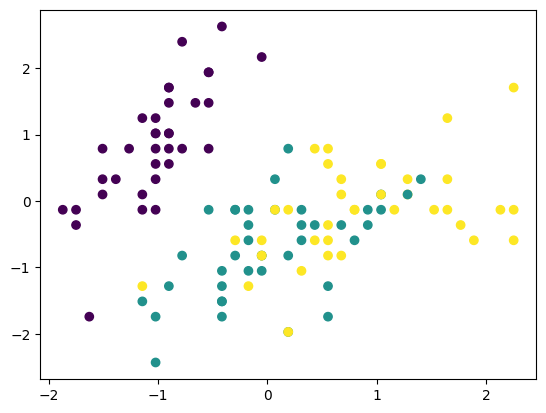

In [23]:
#расчет
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

lda.coef_

small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]

X_train[['sepal length (cm)', 'sepal width (cm)']]

plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)

plt.show()

C:\Users\dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


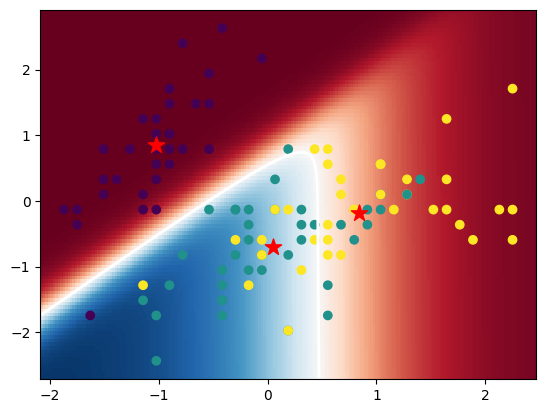

In [24]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

lda_small.means_

plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=y_train)

plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='RdBu',
norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()


C:\Users\dinar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


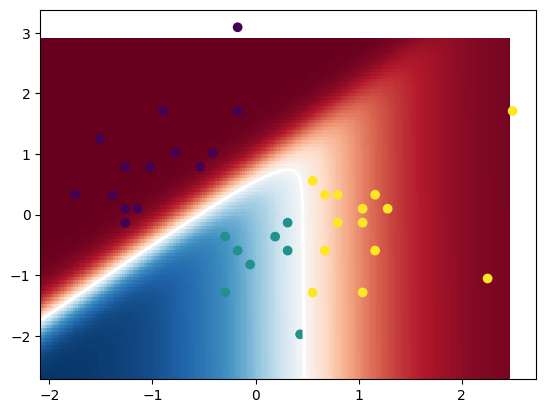

In [25]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lda_small.predict(small_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='RdBu',
norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

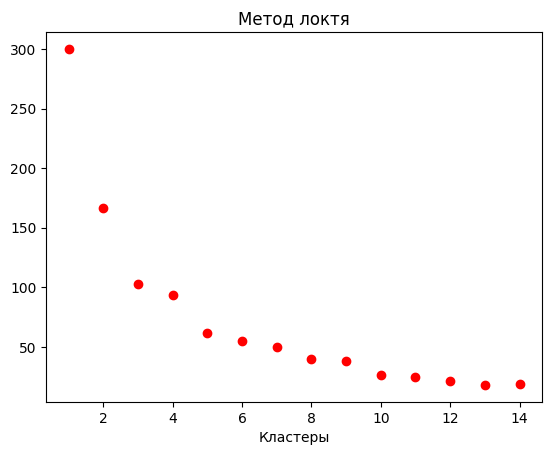

In [26]:
accuracy_score(y_test, lda_small.predict(small_test))

data[['sepal length (cm)', 'sepal width (cm)']].corr()
k_inertia = []


from sklearn.cluster import KMeans

k_inertia = []
ks = range(1, 15)


for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(selected_data[['sepal length (cm)', 'sepal width (cm)']])
    k_inertia.append(clf_kmeans.inertia_)

plt.plot(ks, k_inertia, 'ro')
plt.xlabel('Кластеры')
plt.title('Метод локтя')
plt.show()

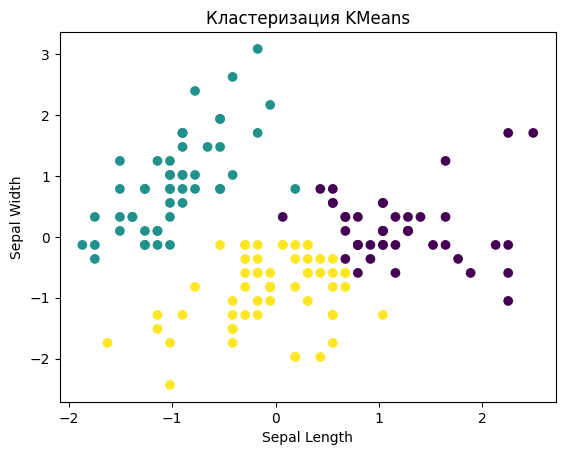

In [28]:
clf_kmeans = KMeans(n_clusters=3) 
labels = clf_kmeans.fit_predict(selected_data[['sepal length (cm)', 'sepal width (cm)']])

plt.scatter(selected_data['sepal length (cm)'], selected_data['sepal width (cm)'], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Кластеризация KMeans')
plt.show()